In [1]:
from UTILITY_quickstart import *

In [2]:
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline3.yml")

In [3]:
csrTF = False



inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]

tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e5,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

setLattice(tao, **importedDefaultSettings)





Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-S2E
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using /Users/nmajik/Documents/SLAC/FACET2-S2E/setLattice_configs/defaults.yml
Number of macro particles = 100000.0
Beam created, written to /tmp/beams/activeBeamFile_11896821934238481394.h5, and reinit to tao


## Laser heater off

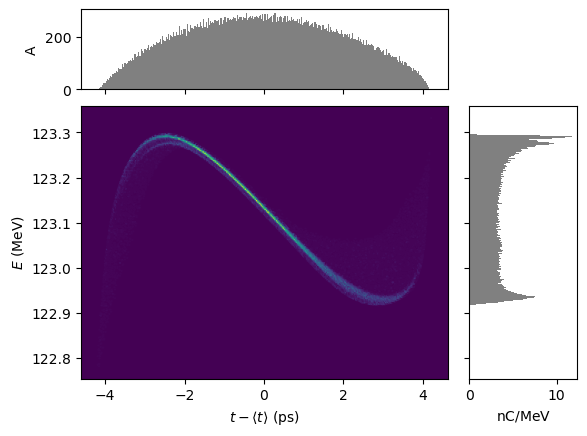

<Figure size 640x480 with 0 Axes>

In [4]:
trackBeam(
    tao, 
    trackEnd = "LH10END", 
    **importedDefaultSettings
)

P = getBeamAtElement(tao, "LH10END")

display(plotMod(P, 'delta_t', 'energy', bins=300) )
plt.clf()

### Directly apply LH modulation

In [5]:
# laserHeater = {
#     "Elaser" : 0.1e-3,
#     "case" : "Gaussian",
#     "sigmat_laser" : 0.5e-12,
#     "offset" : -1e-12
# }

# inputBeam = getBeamAtElement(tao, "HTRUNDF")
# display(plotMod(inputBeam, 'delta_t', 'energy', bins=300) )

# beamAfterLHmodulation, deltagamma, t = addLHmodulation(
#     inputBeam, 
#     **laserHeater
# )

# display(plotMod(beamAfterLHmodulation, 'delta_t', 'energy', bins=300) )

## Gaussian laser profile

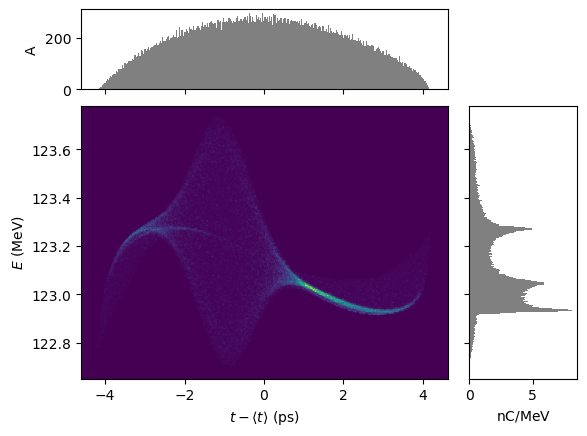

In [6]:
laserHeater = {
    "Elaser" : 0.1e-3,
    "case" : "Gaussian",
    "sigmat_laser" : 0.5e-12,
    "offset" : -1e-12
}

trackBeam(
    tao, 
    trackEnd = "LH10END", 
    laserHeater = laserHeater,
    **importedDefaultSettings
)

P = getBeamAtElement(tao, "LH10END")

display(plotMod(P, 'delta_t', 'energy', bins=300) )
plt.clf()

## Arbitrary laser profile

0.00010000000000000002


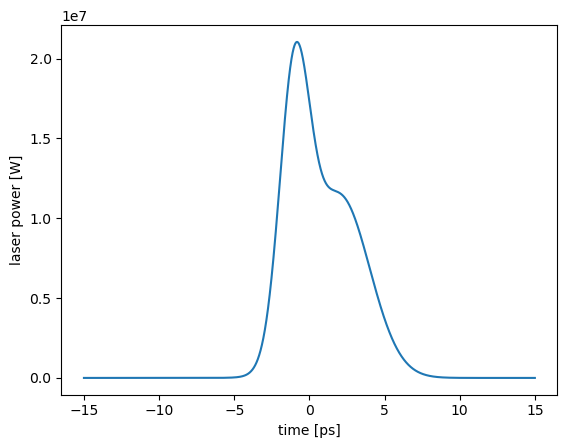

In [7]:
# Define an arbitrary laser power profile - e.g. sum of 2 Gaussians w different sigmas and offsets
Elaser = 0.1e-3;
tvector = np.linspace(-15e-12,15e-12,10000);
sigmat_laser1 = 1e-12;
sigmat_laser2 = 2e-12;
offset1 = -1e-12;
offset2 = 2e-12;
amp1 = 1.5;
amp2 = 1;
Pvector = amp1*np.exp(-0.5*((tvector - offset1) / sigmat_laser1)**2) +  amp2*np.exp(-0.5*((tvector - offset2) / sigmat_laser2)**2)
total_energy = np.abs(np.trapezoid(tvector,Pvector)) 
Pvector = Pvector*(Elaser/total_energy)# Normalize to the total laser energy
print(np.abs(np.trapezoid(tvector,Pvector)))
plt.plot(tvector*1e12,Pvector);plt.xlabel('time [ps]');plt.ylabel('laser power [W]')
plt.show()

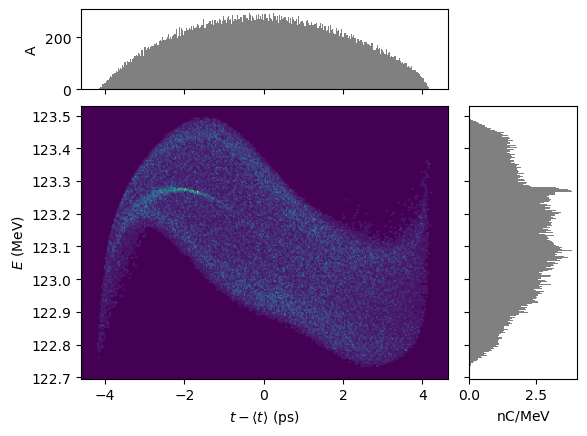

In [8]:
laserHeater = {
    "PowerProfile" : Pvector,  # Use this for 'arbitrary' case
    "tvector" : tvector,            # Use this for 'arbitrary' case
    "case" : 'arbitrary'
}

trackBeam(
    tao, 
    trackEnd = "LH10END", 
    laserHeater = laserHeater,
    **importedDefaultSettings
)

P = getBeamAtElement(tao, "LH10END")

display(plotMod(P, 'delta_t', 'energy', bins=300) )
plt.clf()